**Цель анализа**

Провести исследовательский анализ данных (EDA).

Выявить данные, влияющие на популярность трека.

Данные взяты с Kaggle: https://www.kaggle.com/datasets/melissamonfared/spotify-tracks-attributes-and-popularity/data

Этот набор данных содержит подробные метаданные и аудиоанализ обширной коллекции музыкальных треков Spotify различных жанров. Он включает информацию на уровне треков, такую как популярность, темп, энергетика, танцевальность и другие музыкальные характеристики, которые можно использовать в системах музыкальных рекомендаций, классификации жанров или анализа тенденций. Этот набор данных представляет собой ценный источник для изучения моделей потребления музыки и предпочтений пользователей на основе характеристик песен.

**Описание данных**
- `index` - уникальный индекс трека
- `track_id` - уникальный идентификатор трека
- `artists` - имя испольнителя (ей)
- `album_name` - название альбома
- `track_name` - название трека
- `popularity` - оценка популярности на Spotify (от 0 до 100)
- `duration_ms` - длительность трека в милисекундах
- `explicit` - указывает, содержит ли трек ненормативную лексику
- `danceability` - насколько трек подходит для танцев (от 0,0 до 1,0)
- `energy` - интенсивность и уровень активности трека (от 0,0 до 1,0)
- `key` - числовой код, соответствующий одной из 12 музыкальных нот (полутонов) в октаве.
- `loudness` (громкость) — измеряется в LUFS (Loudness Units relative to Full Scale) и отражает воспринимаемую громкость трека. Spotify нормализует громкость треков примерно к уровню -14 LUFS, чтобы все песни звучали с похожим уровнем громкости, избегая резких скачков громкости между треками.
- `mode` - тональность трека (мажор - 1, минор - 0).
- `speechiness` (речевое содержание) — показатель, который определяет, насколько в треке преобладает речь по сравнению с музыкой. Высокое значение характерно для подкастов или речевых записей, низкое — для чисто музыкальных композиций.
- `acousticness` (акустичность) — степень того, насколько трек звучит как акустический, с использованием натуральных инструментов и без электронной обработки.
- `instrumentalness` (инструментальность) — вероятность того, что трек не содержит вокала, то есть является инструментальной композицией.
- `liveness` (живость) — показывает вероятность того, что трек был записан в живом исполнении с аудиторией, а не в студии.
- `valence` (валентность) — измеряет эмоциональную окраску трека: от грустного и мрачного (низкие значения) до радостного и позитивного (высокие значения), от 0 до 1
- `tempo` (темп) — скорость музыки, измеряемая в ударах в минуту (BPM).
- `time_signature` (размер) — музыкальный размер трека, указывающий количество долей в такте.
- `track_genre` (жанр трека) — музыкальный жанр, к которому относится композиция, например, рок, поп, джаз и т.д.

In [1]:
# загружаем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [2]:
try:
    df = pd.read_csv("/kaggle/input/spotify-tracks-attributes-and-popularity/dataset.csv")
except FileNotFoundError:
    df = pd.read_csv('C:/Users/DrGremlin/Lessons/Kaggle/spotify.csv')

In [3]:
display(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

None

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [4]:
# посмотрим, сколько пустых значений
df.isna().sum()

index               0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Есть по 1 пропуску в названии трека, назнвании альбома и имени испольнителя.

Удалим эти пропуски

In [5]:
df = df.dropna()

In [6]:
# проверим на явные дубликаты
df.duplicated().sum()

0

In [7]:
# проверим числовые столбцы на соответствие интервалам
df.describe()

,index,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


**Промежуточный вывод**

Данные выглядят корректно, явных дубликатов нет, типы данных соответствуют своим колонкам, данных за пределами интервалов нет - можно приступать к анализу данных.

---

## Анализ данных

### Популярность и жанры

Исследуем популярность жанров

In [8]:
# исследуем значения столбца популярности
df['popularity'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count    113999.000000
mean         33.238827
std          22.304959
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
95%          69.000000
99%          80.000000
max         100.000000
Name: popularity, dtype: float64

Видим, что среднее и медиана довольно близки - 33,24 и 35 соответственно, есть небольшой правосторонний перекос.

Медиана 35 говорит о достаточно средней оценке популярности у 50% треков.

In [9]:
# создадим категории популярности
bins = [0, 35, 50, 70, 80, 100]
labels = ['0-35', '36-50', '51-70', '71-80', '81-100']
df['pop_category'] = pd.cut(df['popularity'], bins=bins, labels=labels)

In [10]:
# сгруппируем по жанру и посчитаем среднюю и медианную популярность
df_pop_genre = df.groupby('track_genre').agg(mean=('popularity','mean'),
                              median=('popularity','median')).reset_index()
pop_top_15 = df_pop_genre.sort_values('mean', ascending=False).head(15)
pop_top_15

,track_genre,mean,median
81,pop-film,59.283000,60.0
65,k-pop,56.952953,60.0
15,chill,53.651000,57.0
94,sad,52.379000,54.0
44,grunge,49.594000,55.0
55,indian,49.539000,49.0
5,anime,48.772000,50.0
33,emo,48.128000,51.0
97,sertanejo,47.866000,47.0
80,pop,47.576000,66.0


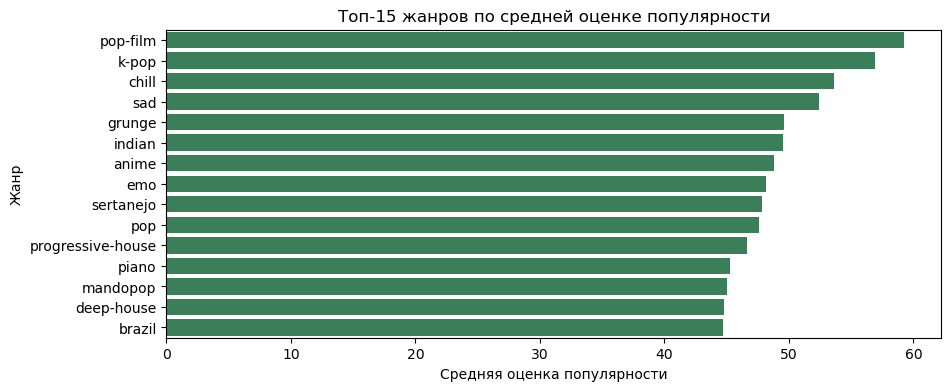

In [11]:
plt.figure(figsize=(10, 4))
sns.barplot(x='mean', y='track_genre', data=pop_top_15, orient='h', color='seagreen')
plt.title('Топ-15 жанров по средней оценке популярности')
plt.xlabel('Средняя оценка популярности')
plt.ylabel('Жанр')
plt.show()

Видим, что среднее популярности не превышает 60.

Средняя оценка популярности выше 50 только у 4 жанров:
- `pop-film`
- `k-pop`
- `chill`
- `sad`

### Корреляция популярности

In [12]:
df.columns

Index(['index', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'pop_category'],
      dtype='object')

In [13]:
corr_matrix = df[['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']].corr()

<Axes: >

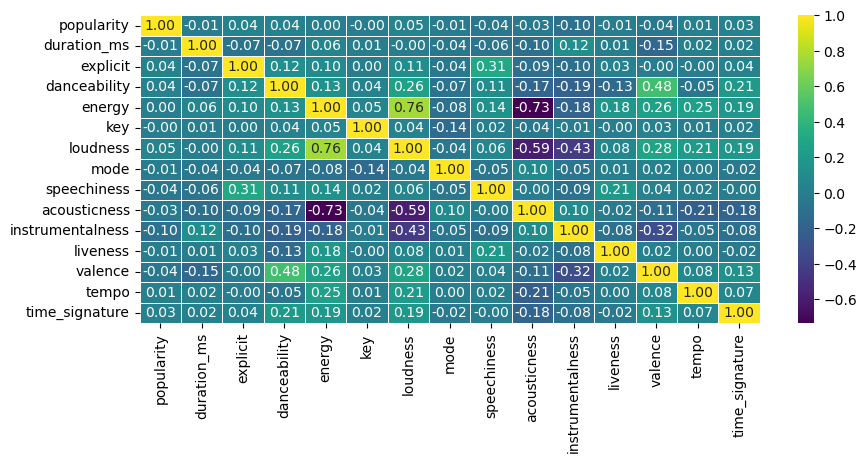

In [14]:
plt.figure(figsize=(10, 4))
sns.heatmap(data=corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='viridis')

Видим корреляцию 0,76 у энергичности трека и его громкости (что вполне очевидно), и обратную корреляцию -0,73 у акустичности трека и его энергичностью (что тоже вполне очевидно).

Оценка популярности ни с каким параметром не коррелирует.

### Популярность и ненормативная лексика

In [15]:
pop_cat_grouped = df.groupby('pop_category', observed=True)['explicit'].mean()*100
pop_cat_grouped

pop_category
0-35       8.017723
36-50      6.742503
51-70     10.220729
71-80     14.953751
81-100    25.366876
Name: explicit, dtype: float64

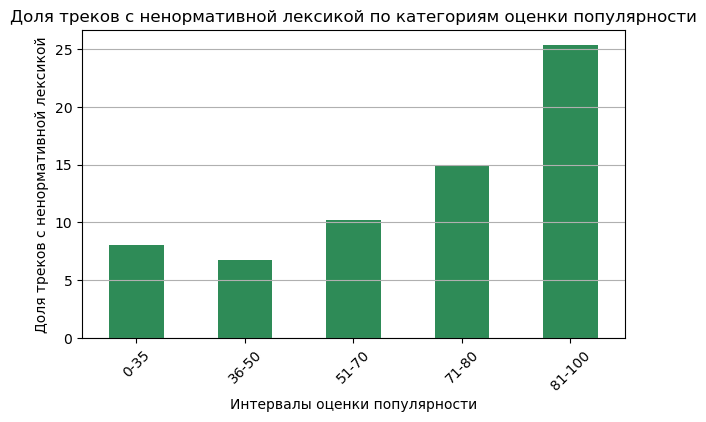

In [16]:
plt.figure(figsize=(7,4))
pop_cat_grouped.plot(kind='bar', legend=False, color='seagreen', rot=45)
plt.grid(axis='y')
plt.title('Доля треков с ненормативной лексикой по категориям оценки популярности')
plt.xlabel('Интервалы оценки популярности')
plt.ylabel('Доля треков с ненормативной лексикой')
plt.show()

Видим, что больше всего треков с ненормативной лексикой - 25% - имеют треки с высокой оценкой популярности - от 81 до 100.

Посмотрим, какое соотношение имеют треки с ненормативной лексикой по отношению ко всем трекам.

In [17]:
df['explicit'].mean()*100

8.5500750006579

Только около 8,55% всех треков содержат ненормативную лексику.

### Популярность и тональность

Рассмотрим, как связаны популярность трека и его тональность (мажор/минор).

In [23]:
mode_grouped = df.groupby('pop_category', observed=True)['mode'].mean()*100
mode_grouped

pop_category
0-35      63.972096
36-50     64.570359
51-70     61.756238
71-80     60.894142
81-100    58.805031
Name: mode, dtype: float64

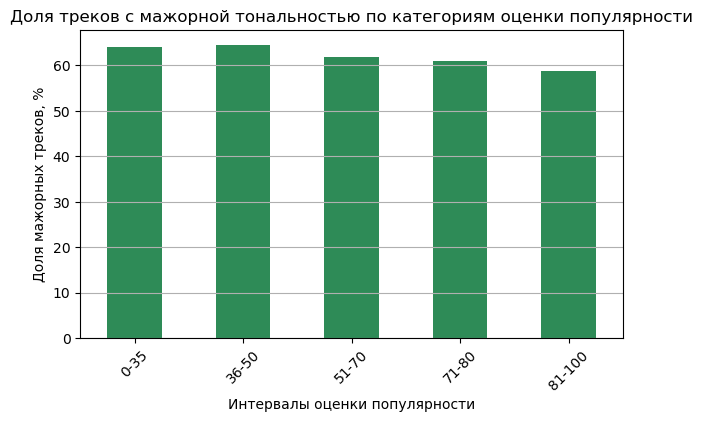

In [25]:
plt.figure(figsize=(7,4))
mode_grouped.plot(kind='bar', legend=False, color='seagreen', rot=45)
plt.grid(axis='y')
plt.title('Доля треков с мажорной тональностью по категориям оценки популярности')
plt.xlabel('Интервалы оценки популярности')
plt.ylabel('Доля мажорных треков, %')
plt.show()

Видим, что у самой высокой оценочной категории самый низкий уровень мажорных треков по сравнению с другими оценочными категориями. При этом мажорных треков в высокой категории почти 59%!

### Популярность и другие параметры

Исследуем, что показывают различные параметры в зависимости от категории оценки популярности

In [28]:
# напишим функцию для группировки по оценочной категории и выводу графика
def pop_cat_grouped(col):
    grouped = df.groupby('pop_category', observed=True)[col].mean()
    print(f'Распределение {col} по категориям оценки популярности: \n')
    display(grouped)
    plt.figure(figsize=(7,4))
    grouped.plot(kind='bar', legend=False, color='seagreen', rot=45)
    plt.grid(axis='y')
    plt.title(f'Значения {col} по категориям оценки популярности')
    plt.xlabel('Интервалы оценки популярности')
    plt.ylabel(f'Значение {col}')
    plt.show()

Распределение danceability по категориям оценки популярности: 



pop_category
0-35      0.550509
36-50     0.571782
51-70     0.575121
71-80     0.608960
81-100    0.658111
Name: danceability, dtype: float64

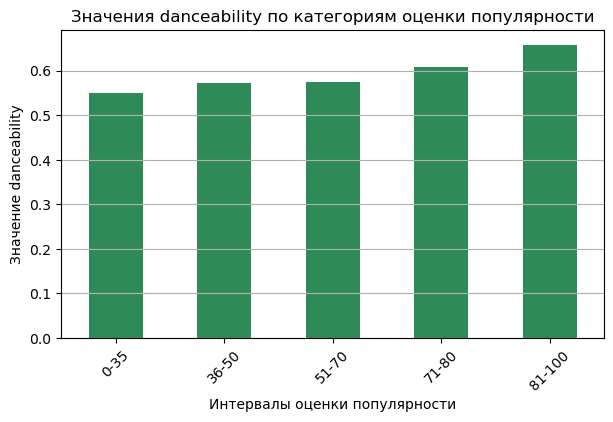

Распределение energy по категориям оценки популярности: 



pop_category
0-35      0.659826
36-50     0.638365
51-70     0.622411
71-80     0.673366
81-100    0.679426
Name: energy, dtype: float64

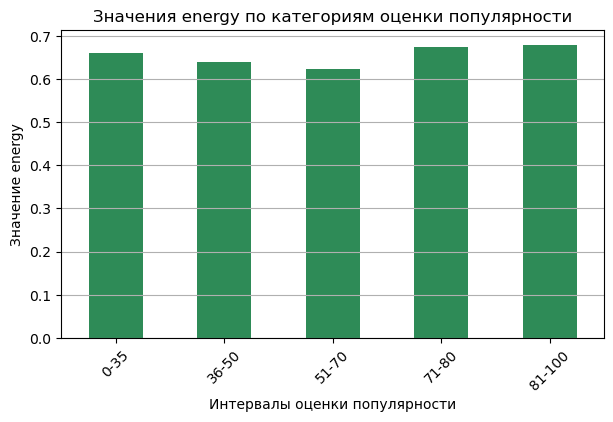

Распределение loudness по категориям оценки популярности: 



pop_category
0-35     -8.598075
36-50    -8.069179
51-70    -8.249829
71-80    -6.667162
81-100   -6.127299
Name: loudness, dtype: float64

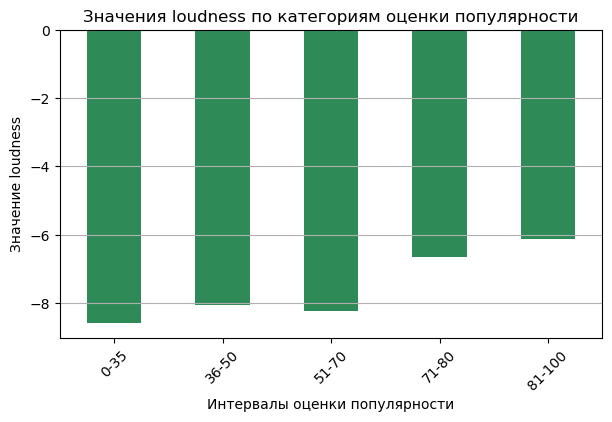

Распределение speechiness по категориям оценки популярности: 



pop_category
0-35      0.101411
36-50     0.074436
51-70     0.075346
71-80     0.074599
81-100    0.081458
Name: speechiness, dtype: float64

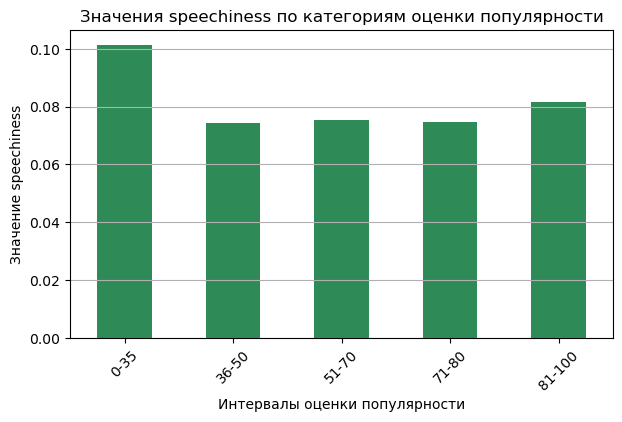

Распределение acousticness по категориям оценки популярности: 



pop_category
0-35      0.308469
36-50     0.330718
51-70     0.310560
71-80     0.223484
81-100    0.188535
Name: acousticness, dtype: float64

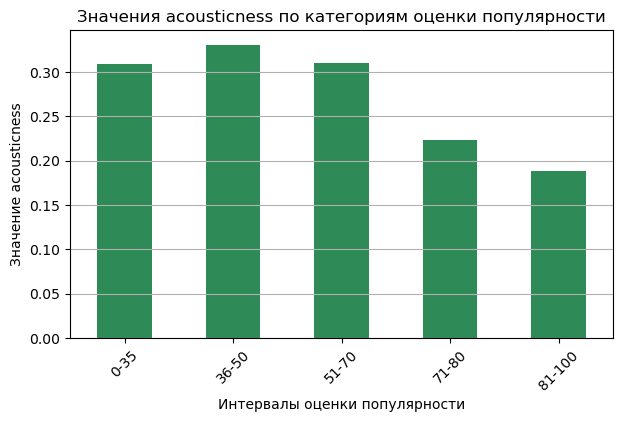

Распределение instrumentalness по категориям оценки популярности: 



pop_category
0-35      0.218207
36-50     0.136528
51-70     0.127557
71-80     0.037271
81-100    0.026476
Name: instrumentalness, dtype: float64

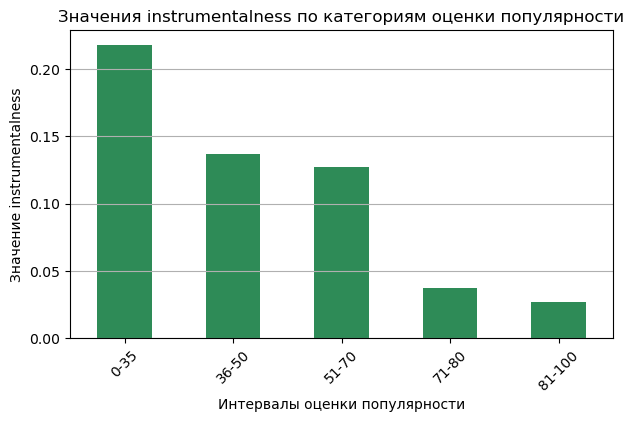

Распределение liveness по категориям оценки популярности: 



pop_category
0-35      0.225374
36-50     0.240061
51-70     0.187249
71-80     0.171549
81-100    0.168345
Name: liveness, dtype: float64

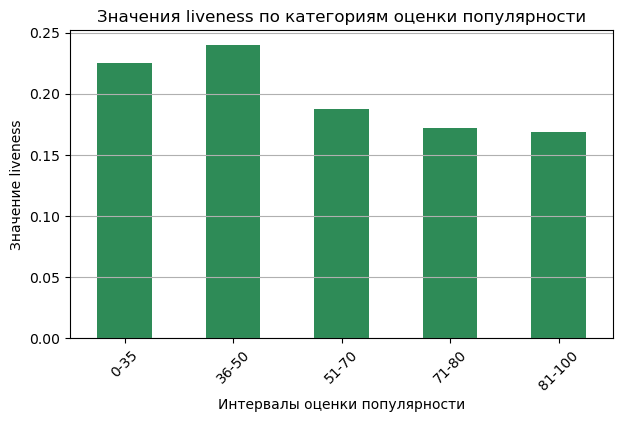

Распределение valence по категориям оценки популярности: 



pop_category
0-35      0.476251
36-50     0.470217
51-70     0.445234
71-80     0.504406
81-100    0.507980
Name: valence, dtype: float64

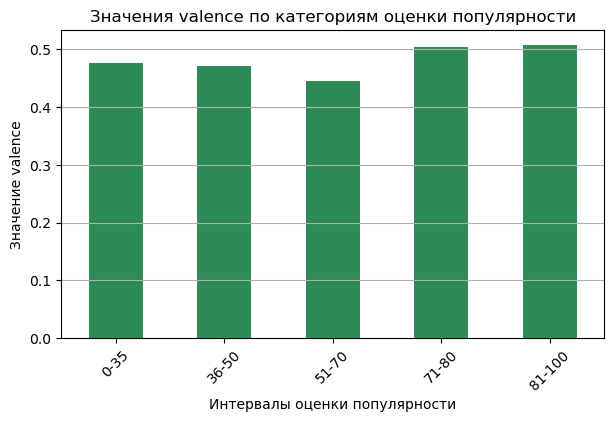

Распределение tempo по категориям оценки популярности: 



pop_category
0-35      122.879561
36-50     123.612641
51-70     121.764433
71-80     120.357872
81-100    118.426755
Name: tempo, dtype: float64

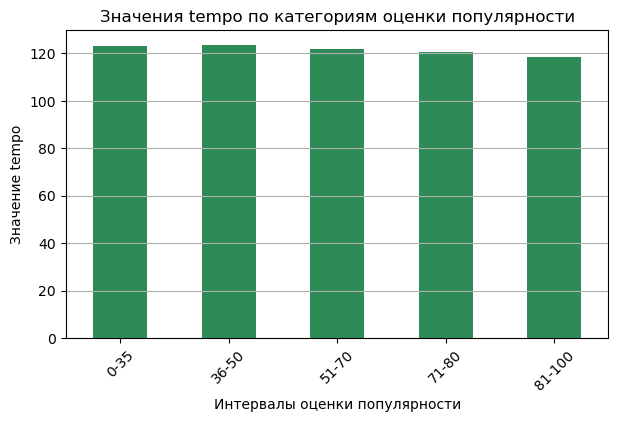

Распределение time_signature по категориям оценки популярности: 



pop_category
0-35      3.888219
36-50     3.916484
51-70     3.918208
71-80     3.945272
81-100    3.947589
Name: time_signature, dtype: float64

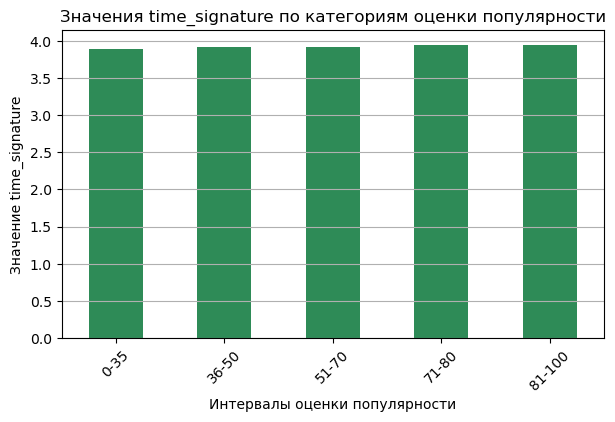

In [29]:
# сделаем список столбцов, которые рассмотрим в разрезе оценочных категорий
col_list = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# применим функцию pop_cat_grouped к этим столбцам
for col in col_list:
    pop_cat_grouped(col)

**Выводы**

Что мы увидели для треков с самой высокой оценкой популярноси от 81 до 100:
- самый высокий средний показатель танцевальности - 0,658.
- самый высокий средний показатель энергичности - 0,679 (но в среднем все оценочные категории выше 0,62, что говорит о не сильном влиянии этого параметра на популярность трека).
- самое громкое звучание -6,13
- 2ое место по речетативу (0,08), но это достаточно низкий уровень для этого показателя
- самое низкое среднее значение акустичности трека (0,188) и инструментальности (0,026)
- самое низкое среднее значение по живому звуку (0,168)
- самый высокий средний показатель позитивности трека (0,51)
- самый низкий битрейт (118,43), но не сильно отличается от остальных (интервал от 118,43 до 123,61)

**Итоговые выводы**

Т.е., чтобы попасть в самые популярные, трек должен быть:
- танцевальным
- звучать громче других
- быть студийно записанным
- не содержать живых инструментов
- обязательно быть с голосом (песня)
- должен быть позитивным
- содержать ненормативную лексику.